| ![logo](udinus.png)      |**LEMBAR SOAL UJIAN <br> FAKULTAS ILMU KOMPUTER <br> UNIVERSITAS DIAN NUSWANTORO SEMARANG <br>** JL. IMAM BONJOL NO. 207 SEMARANG TELP. 024-3575915, 024-3575916 |
| :---                     |    :----:   | 


|UJIAN TENGAH SEMESTER GASAL 2022/2023|
|:---:|


|Mata Kuliah: Analitika Media Sosial | Sifat: Take Home|
| :---                     |    ----:   |
|Hari / Tanggal: **01 November 2022**       | Waktu: **10.20 - 12.00** |
|Kelompok: A12.6501                 | Dosen: **Abu Salam, M.Kom**|
|NIM: A12.2020.06480                  |Nama: Duta Firdaus Wicaksono




# Petunjuk Pengerjaan Soal:
- Panduan pengerjaan dalam bentuk gambar ada dibawah block ini
- Sudah disediakan tiap block untuk anda dilengkapi, silakan isi ditempat tersebut, jika block cell kurang, silakan tambahkan lagi **diperbolehkan memodifikasi atau menambahkan proses dari blok yang sudah ada**
- **TUJUAN: ANALISIS TAHAP PRE PROCESSING DAN BERAPA PERFORMA DARI SKEMA YANG DIBUAT DENGAN MENGGUNAKAN TARGET `EMOSI`**

FORMAT PENGIRIMAN SOAL (PILIH SALAH SATU)
- REPOSITORIKAN FILE IPYNB KE GITHUB & KIRIM URL GITHUB KE KULINO BLOK UTS
- FORMAT PENAMAN FILE: AMS_NIM (GANTI TANDA TITIK PADA NIM MENJADI `UNDERSCORE`)


SKEMA KLASIFIKASI
===
![klasifikasi](klasifikasi.png)

SKEMA PRE-PREPROCESSING DATA
===
![preprocessing](preprocessing.png)

# Load Library

Memanggil library yang akan digunakan

In [6]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Load dataset mentah - lihat skema klasifikasi

In [7]:
df = pd.read_csv('Dataset_Sentimen_Emosi.csv')

# Preprocessing Tahap 00
## Hapus label  `Sentimen` karena yang akan dipakai adalah `Emosi`

In [8]:
df = df.drop(['Sentimen'], axis=1)

## cek info

In [9]:
df.head()

,Unnamed: 0,Tweet,Emosi
0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1
1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1
2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1
3,3,Covid belum nyampe prigen mbak hmm hoax,-2
4,4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  904 non-null    int64 
 1   Tweet       904 non-null    object
 2   Emosi       904 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 21.3+ KB


# Preprocessing Tahap 01

## Proses Penataan Data
bisa menggunakan ekphrasis

In [13]:
!pip install ekphrasis

In [11]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

E:\anaconda3\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


E:\anaconda3\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


## Pembersihan element yang tidak digunakan

Deklarasikan sesuai kebutuhan

In [12]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

In [13]:
def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

**Panggil dan jalankan fungsi yang di deskripsikan diatas**

In [14]:
final_string = []
for text in df['Tweet'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [15]:
df["step01"] = final_string

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `step01`

In [16]:
### Tampilkan posisi data terakhir (10 Teratas)
df.head(10)

,Unnamed: 0,Tweet,Emosi,step01
0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1,cegah mata rantai covid number mari kita dirum...
1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1,aku mohon yaallah semoga wabah covid number me...
2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1,pemprov papua naikkan status jadi tanggap daru...
3,3,Covid belum nyampe prigen mbak hmm hoax,-2,covid belum nyampe prigen mbak hmm hoax
4,4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2,nyuruh orang pintar lu aja togog itu kerumunan...
5,5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1,pikir2 balik byk mnde plk nk setelkn lepas covid
6,6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1,selamat pagi hari jum at jum at keempat di kal...
7,7,"Hikmah di balik musibah covid-19, smg para pej...",-2,hikmah di balik musibah covid number smg para ...
8,8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1,cegah covid number beserta jajaran polsek kura...
9,9,Ya Allah kami memohon pada mu perkenankanlah d...,-1,ya allah kami memohon pada mu perkenankanlah d...


## Hapus data kosong

In [17]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [18]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 78 to 78
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1 non-null      int64 
 1   Tweet       1 non-null      object
 2   Emosi       1 non-null      int64 
 3   step01      1 non-null      object
dtypes: int64(2), object(2)
memory usage: 40.0+ bytes


In [19]:
df_hapus.head(10)

,Unnamed: 0,Tweet,Emosi,step01
78,78,covid,1,covid


In [20]:
df_new = df[~df.isin(df_hapus)].dropna()

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 903
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  903 non-null    float64
 1   Tweet       903 non-null    object 
 2   Emosi       903 non-null    float64
 3   step01      903 non-null    object 
dtypes: float64(2), object(2)
memory usage: 35.3+ KB


In [33]:
df_new

,Unnamed: 0,Tweet,Emosi,step01
0,0.0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...
1,1.0,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...
2,2.0,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...
3,3.0,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax
4,4.0,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...
...,...,...,...,...
899,899.0,Seluruh negara di dunia mengalami masa sulit k...,-2.0,seluruh negara di dunia mengalami masa sulit k...
900,900.0,"Setelah covid dan skripsi disaster selesai, ma...",2.0,setelah covid dan skripsi disaster selesai mau...
901,901.0,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...",1.0,malam ini projek benda boleh bincang number ma...
902,902.0,Pontang - panting di koyak covid 19,-2.0,pontang panting di koyak covid number


## Pembersihan data dengan konsep rubah kata `SLANG` menjadi kata `BAKU`

In [22]:
## Bisa menggunakan nltk 
import nltk
from nltk.tokenize import word_tokenize 

In [23]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [24]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `tokens`

In [25]:
df_new.head(10)

,Unnamed: 0,Tweet,Emosi,step01,tokens
0,0.0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"[cegah, mata, rantai, covid, number, mari, kit..."
1,1.0,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...,"[aku, mohon, yaallah, semoga, wabah, covid, nu..."
2,2.0,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga..."
3,3.0,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]"
4,4.0,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k..."
5,5.0,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir2 balik byk mnde plk nk setelkn lepas covid,"[pikir2, balik, byk, mnde, plk, nk, setelkn, l..."
6,6.0,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jum at jum at keempat di kal...,"[selamat, pagi, hari, jum, at, jum, at, keempa..."
7,7.0,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid number smg para ...,"[hikmah, di, balik, musibah, covid, number, sm..."
8,8.0,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid number beserta jajaran polsek kura...,"[cegah, covid, number, beserta, jajaran, polse..."
9,9.0,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank..."


In [26]:
normalized_word = pd.read_excel("kamus_clean.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df_new['tokens_perbaikan'] = df_new['tokens'].apply(normalized_term)

In [27]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [28]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [29]:
df_new["step02"] = final_string_tokens

In [2]:
#### Sampai tahap ini didaparkan kolom baru untuk Kolom `final_token` `dan step02`

In [30]:
df_new.head(10)

,Unnamed: 0,Tweet,Emosi,step01,tokens,tokens_perbaikan,final_tokens,step02
0,0.0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...",cegah mata rantai covid number mari kita dirum...
1,1.0,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...,"[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...",aku mohon yaallah semoga wabah covid number me...
2,2.0,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...
3,3.0,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...","[covid, belum, nyampe, prigen, mbak, aduh, boh...",covid belum nyampe prigen mbak aduh bohong
4,4.0,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, kamu, saja, togog, itu...","[nyuruh, orang, pintar, kamu, saja, togog, itu...",nyuruh orang pintar kamu saja togog itu kerumu...
5,5.0,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir2 balik byk mnde plk nk setelkn lepas covid,"[pikir2, balik, byk, mnde, plk, nk, setelkn, l...","[pikir2, balik, banyak, mnde, plk, nk, setelkn...","[pikir2, balik, banyak, mnde, plk, nk, setelkn...",pikir2 balik banyak mnde plk nk setelkn lepas ...
6,6.0,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jum at jum at keempat di kal...,"[selamat, pagi, hari, jum, at, jum, at, keempa...","[selamat, pagi, hari, jum, at, jum, at, keempa...","[selamat, pagi, hari, jum, at, jum, at, keempa...",selamat pagi hari jum at jum at keempat di kal...
7,7.0,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid number smg para ...,"[hikmah, di, balik, musibah, covid, number, sm...","[hikmah, di, balik, musibah, covid, number, se...","[hikmah, di, balik, musibah, covid, number, se...",hikmah di balik musibah covid number semoga pa...
8,8.0,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid number beserta jajaran polsek kura...,"[cegah, covid, number, beserta, jajaran, polse...","[cegah, covid, number, beserta, jajaran, polse...","[cegah, covid, number, beserta, jajaran, polse...",cegah covid number beserta jajaran polsek kura...
9,9.0,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank...","[iya, allah, kami, memohon, pada, mu, perkenan...","[iya, allah, kami, memohon, pada, mu, perkenan...",iya allah kami memohon pada mu perkenankanlah ...


## simpan file terlebih dahulu
gunakan fitur ini, kenapa? untuk mengecek apakah preprocessing kita sudah sesuai logika atau tidak
- Contoh : pastikan kata `beserta` tetap menjadi `beserta`, bukan `bese a`

**setelah anda melihat bahwa dataset sudah tepat, kita lanjut ke tahap berikutnya**

In [31]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

# Stemming menggunakan Sastrawi

## load sastrawi

In [37]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## stopwords

In [51]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']
 
data = factory.get_stop_words()+more_stopword
    
stopwords_sastrawi = factory.create_stop_word_remover()

dictionary = ArrayDictionary(data)
str_stopwords = StopWordRemover(dictionary)

In [52]:
df_new['step02'] = df_new['step02'].apply(str)

In [53]:
df_new.head()

,Unnamed: 0,Tweet,Emosi,step01,tokens,tokens_perbaikan,final_tokens,step02
0,0.0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...",cegah mata rantai covid number mari kita dirum...
1,1.0,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...,"[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...",aku mohon yaallah semoga wabah covid number me...
2,2.0,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...
3,3.0,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...","[covid, belum, nyampe, prigen, mbak, aduh, boh...",covid belum nyampe prigen mbak aduh bohong
4,4.0,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, kamu, saja, togog, itu...","[nyuruh, orang, pintar, kamu, saja, togog, itu...",nyuruh orang pintar kamu saja togog itu kerumu...


In [54]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = str_stopwords.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [55]:
df_new.loc[:, ('ProcessedText')] = final_string

In [56]:
df_new.head()

,Unnamed: 0,Tweet,Emosi,step01,tokens,tokens_perbaikan,final_tokens,step02,ProcessedText
0,0.0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...",cegah mata rantai covid number mari kita dirum...,cegah mata rantai covid number kita rumah hing...
1,1.0,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...,"[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...",aku mohon yaallah semoga wabah covid number me...,aku mohon yaallah moga wabah covid number hila...
2,2.0,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
3,3.0,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...","[covid, belum, nyampe, prigen, mbak, aduh, boh...",covid belum nyampe prigen mbak aduh bohong,covid nyampe prigen mbak aduh bohong
4,4.0,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, kamu, saja, togog, itu...","[nyuruh, orang, pintar, kamu, saja, togog, itu...",nyuruh orang pintar kamu saja togog itu kerumu...,nyuruh orang pintar kamu togog kerumun orang n...


## simpan kembali untuk jaga-jaga
- cek apakah stop words ada yang perlu dirubah atau tidak

In [57]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

# penutup bagian preprocessing data

disini data sudah bersih, kita akan masuk ke tahap machine learning

# Mulai Modelling

## bagi menjadi feature dan label

In [58]:
dataset_feature = df_new['ProcessedText']

In [59]:
dataset_label = df_new['Emosi']

## Cek Distribusi Data

In [60]:
dataset_label.value_counts()

 1.0    300
-1.0    245
-2.0    201
 2.0    157
Name: Emosi, dtype: int64

In [61]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

 1.0    33.2%
-1.0    27.1%
-2.0    22.3%
 2.0    17.4%
Name: Emosi, dtype: object

<Figure size 864x576 with 0 Axes>

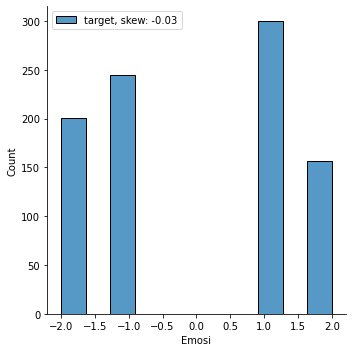

In [62]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

Kesimpulan Dataset :
Dari informasi distribusi data diatas dapat disimpulkan bahwa label Emosi bernilai 1.0 mendapatkan value terbanyak yaitu 300, sedangkan value terendah yaitu 157 ada pada label Emosi bernilai 2.0.

## Fitur Ekstraksi Menggunakan TF-IDF

### Cek Emosi 

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
vectorizer = TfidfVectorizer()

In [65]:
positive_low_reviews = df_new[(df_new["Emosi"] == 1)]
negative_low_reviews = df_new[(df_new["Emosi"] == -1)]
positive_high_reviews = df_new[(df_new["Emosi"] == 2)]
negative_high_reviews = df_new[(df_new["Emosi"] == -2)]

### cek emosi positive low

In [66]:
positive_low_reviews.head()

,Unnamed: 0,Tweet,Emosi,step01,tokens,tokens_perbaikan,final_tokens,step02,ProcessedText
0,0.0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...",cegah mata rantai covid number mari kita dirum...,cegah mata rantai covid number kita rumah hing...
2,2.0,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
5,5.0,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir2 balik byk mnde plk nk setelkn lepas covid,"[pikir2, balik, byk, mnde, plk, nk, setelkn, l...","[pikir2, balik, banyak, mnde, plk, nk, setelkn...","[pikir2, balik, banyak, mnde, plk, nk, setelkn...",pikir2 balik banyak mnde plk nk setelkn lepas ...,pikir2 balik banyak mnde plk nk setelkn lepas ...
8,8.0,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid number beserta jajaran polsek kura...,"[cegah, covid, number, beserta, jajaran, polse...","[cegah, covid, number, beserta, jajaran, polse...","[cegah, covid, number, beserta, jajaran, polse...",cegah covid number beserta jajaran polsek kura...,cegah covid number serta jajar polsek ranji la...
15,15.0,"Ada 15 cara menyuruh Covid-19 segera pergi, Ja...",1.0,ada number cara menyuruh covid number segera p...,"[ada, number, cara, menyuruh, covid, number, s...","[ada, number, cara, menyuruh, covid, number, s...","[ada, number, cara, menyuruh, covid, number, s...",ada number cara menyuruh covid number segera p...,number cara suruh covid number segera pergi ja...


In [67]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_low_reviews["ProcessedText"].values)

In [68]:
Positive_1_tf_idf.shape

(300, 5218)

In [69]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('covid', 7.976469502589806)
('number', 7.806318481416106)
('covid number', 7.777686668741779)
('sebar', 6.184710033361751)
('cegah', 6.164090746159015)
('virus', 6.099552225021444)
('rumah', 5.69408711691328)
('sama', 5.69408711691328)
('corona', 5.511765560119326)
('laku', 5.47094356559907)
('sebar covid', 5.428383951180274)
('jaga', 5.383932188609441)
('perintah', 5.337412172974547)
('orang', 5.288622008805115)
('virus covid', 5.288622008805115)
('masyarakat', 5.237328714417565)
('sebar virus', 5.237328714417565)
('sehat', 5.237328714417565)
('virus corona', 5.237328714417565)
('ada', 5.183261493147289)
('date', 5.183261493147289)
('iya', 5.183261493147289)
('tangan', 5.183261493147289)
('tetap', 5.183261493147289)
('cegah covid', 5.12610307930734)
('cegah sebar', 5.12610307930734)
('corona covid', 5.12610307930734)
('jadi', 5.12610307930734)
('warga', 5.12610307930734)
('indonesia', 5.065478457490905)
('pasien', 5.065478457490905)
('baru', 5.000939936353334)
('jangan', 5.0009399363

E:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [72]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

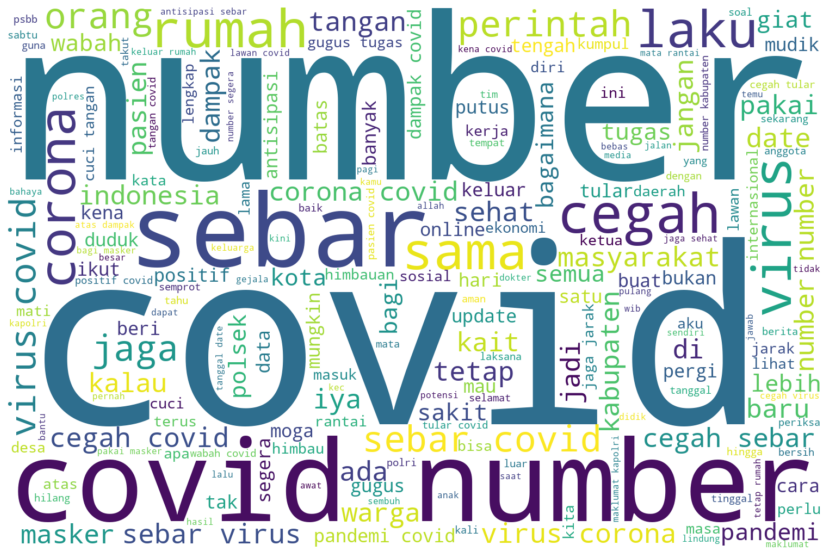

In [73]:
PlotWordCloud(d)

### cek emosi positive high

In [74]:
positive_high_reviews.head()

,Unnamed: 0,Tweet,Emosi,step01,tokens,tokens_perbaikan,final_tokens,step02,ProcessedText
10,10.0,"Sah.. Cegah Covid-19 Meluas, Pemerintah Revisi...",2.0,sah cegah covid number meluas pemerintah revis...,"[sah, cegah, covid, number, meluas, pemerintah...","[sah, cegah, covid, number, meluas, pemerintah...","[sah, cegah, covid, number, meluas, pemerintah...",sah cegah covid number meluas pemerintah revis...,sah cegah covid number luas perintah revisi ha...
11,11.0,Bencana Nasional Covid-19; DPRD Indramayu Mint...,2.0,bencana nasional covid number dprd indramayu m...,"[bencana, nasional, covid, number, dprd, indra...","[bencana, nasional, covid, number, dprd, indra...","[bencana, nasional, covid, number, dprd, indra...",bencana nasional covid number dprd indramayu m...,bencana nasional covid number dprd indramayu m...
14,14.0,Skrinews - Pdt. JIMMY: MARI BERSAMA MEMERANGI ...,2.0,skrinews pdt jimmy mari bersama memerangi viru...,"[skrinews, pdt, jimmy, mari, bersama, memerang...","[skrinews, pdt, jimmy, mari, bersama, memerang...","[skrinews, pdt, jimmy, mari, bersama, memerang...",skrinews pdt jimmy mari bersama memerangi viru...,skrinews pdt jimmy sama rang virus corona covi...
21,21.0,"Temanggung, Jawa Tengah...anggota gugus tugas ...",2.0,temanggung jawa tengah anggota gugus tugas cov...,"[temanggung, jawa, tengah, anggota, gugus, tug...","[temanggung, jawa, tengah, anggota, gugus, tug...","[temanggung, jawa, tengah, anggota, gugus, tug...",temanggung jawa tengah anggota gugus tugas cov...,tanggung jawa tengah anggota gugus tugas covid...
33,33.0,Amalkan langkah-langkah pencegahan penularan C...,2.0,amalkan langkah langkah pencegahan penularan c...,"[amalkan, langkah, langkah, pencegahan, penula...","[amalkan, langkah, langkah, pencegahan, penula...","[amalkan, langkah, langkah, pencegahan, penula...",amalkan langkah langkah pencegahan penularan c...,amal langkah langkah cegah tular covid number ...


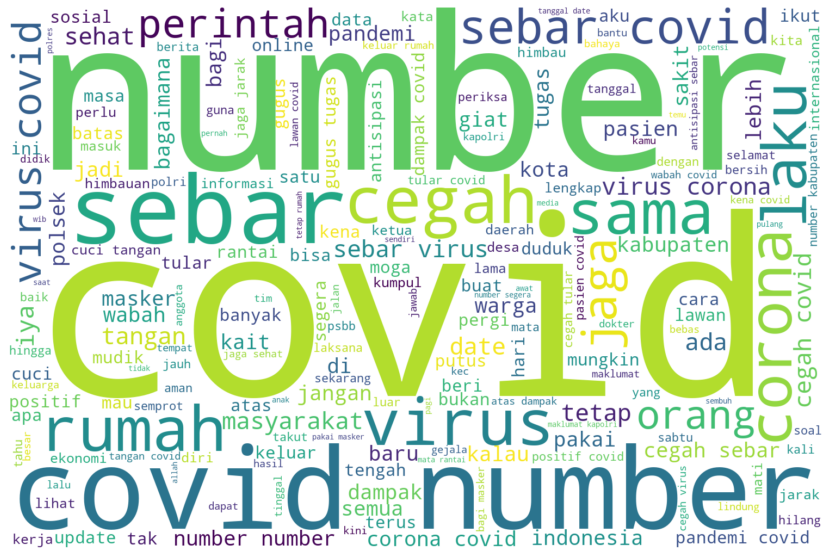

In [75]:
PlotWordCloud(d)

### cek emosi negative low

In [76]:
negative_low_reviews.head()

,Unnamed: 0,Tweet,Emosi,step01,tokens,tokens_perbaikan,final_tokens,step02,ProcessedText
1,1.0,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...,"[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...",aku mohon yaallah semoga wabah covid number me...,aku mohon yaallah moga wabah covid number hila...
6,6.0,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jum at jum at keempat di kal...,"[selamat, pagi, hari, jum, at, jum, at, keempa...","[selamat, pagi, hari, jum, at, jum, at, keempa...","[selamat, pagi, hari, jum, at, jum, at, keempa...",selamat pagi hari jum at jum at keempat di kal...,selamat pagi hari jum at jum at empat kala pan...
9,9.0,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank...","[iya, allah, kami, memohon, pada, mu, perkenan...","[iya, allah, kami, memohon, pada, mu, perkenan...",iya allah kami memohon pada mu perkenankanlah ...,iya allah mohon mu kenan doa doa rana sungguh ...
12,12.0,"Cegah Covid-19, Pemprov dan FKUB Papua Barat S...",-1.0,cegah covid number pemprov dan fkub papua bara...,"[cegah, covid, number, pemprov, dan, fkub, pap...","[cegah, covid, number, pemprov, dan, fkub, pap...","[cegah, covid, number, pemprov, dan, fkub, pap...",cegah covid number pemprov dan fkub papua bara...,cegah covid number pemprov fkub papua barat se...
23,23.0,Btw long weekend ni pada mau kemana... Dulu se...,-1.0,btw long weekend ni pada mau kemana dulu sebel...,"[btw, long, weekend, ni, pada, mau, kemana, du...","[eh, long, weekend, ini, pada, mau, kemana, du...","[eh, long, weekend, ini, pada, mau, kemana, du...",eh long weekend ini pada mau kemana dulu sebel...,long weekend pada mau dulu ada sih covid numbe...


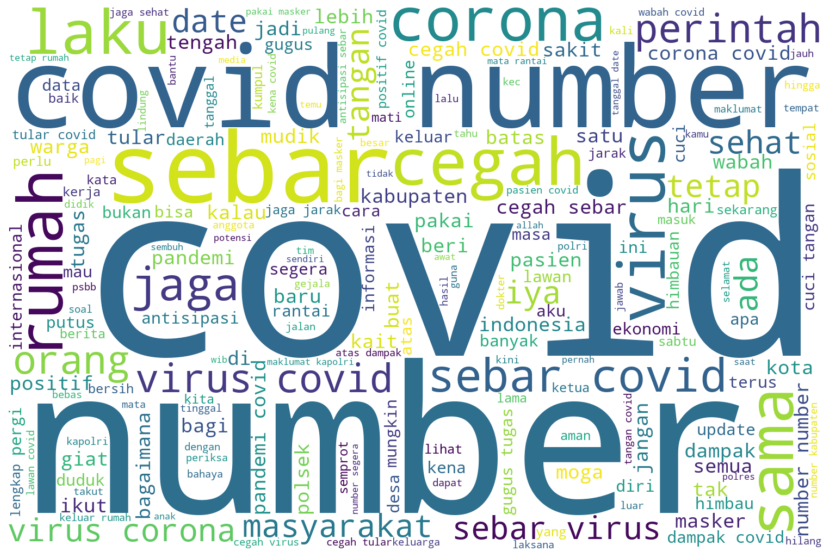

In [77]:
PlotWordCloud(d)

### cek emosi negative high

In [78]:
negative_high_reviews.head()

,Unnamed: 0,Tweet,Emosi,step01,tokens,tokens_perbaikan,final_tokens,step02,ProcessedText
3,3.0,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...","[covid, belum, nyampe, prigen, mbak, aduh, boh...",covid belum nyampe prigen mbak aduh bohong,covid nyampe prigen mbak aduh bohong
4,4.0,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, kamu, saja, togog, itu...","[nyuruh, orang, pintar, kamu, saja, togog, itu...",nyuruh orang pintar kamu saja togog itu kerumu...,nyuruh orang pintar kamu togog kerumun orang n...
7,7.0,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid number smg para ...,"[hikmah, di, balik, musibah, covid, number, sm...","[hikmah, di, balik, musibah, covid, number, se...","[hikmah, di, balik, musibah, covid, number, se...",hikmah di balik musibah covid number semoga pa...,hikmah balik musibah covid number moga jabat p...
13,13.0,pagi... kenapa ya di daerah sy (cipinang besar...,-2.0,pagi kenapa ya di daerah sy cipinang besar sel...,"[pagi, kenapa, ya, di, daerah, sy, cipinang, b...","[pagi, kenapa, iya, di, daerah, saya, cipinang...","[pagi, kenapa, iya, di, daerah, saya, cipinang...",pagi kenapa iya di daerah saya cipinang besar ...,pagi iya daerah cipinang besar selatan number ...
17,17.0,"Aku baru bangun tidur, dan menyeruput kopi sed...",-2.0,aku baru bangun tidur dan menyeruput kopi sedi...,"[aku, baru, bangun, tidur, dan, menyeruput, ko...","[aku, baru, bangun, tidur, dan, menyeruput, ko...","[aku, baru, bangun, tidur, dan, menyeruput, ko...",aku baru bangun tidur dan menyeruput kopi sedi...,aku baru bangun tidur seruput kopi sedikit ibu...


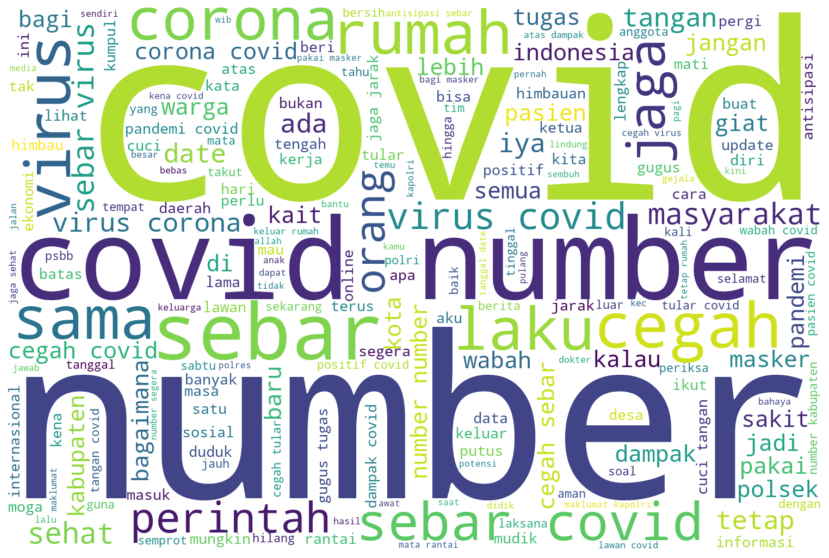

In [79]:
PlotWordCloud(d)

## Cek emosi untuk Semua label

**jangan lupa, gunakan semua data, maka yang dilakukan adalah mengolah data `df_new["Emosi"]`**

In [80]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [84]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [85]:
Data_TFIDF.shape

(903, 14210)

# Training dan Testing dibagi menjadi 70 - 30

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [93]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [94]:
test_x

70     selamat ingat jumat agung selamat makna arti k...
458    cegah covid number serta jajar polsek ranji la...
219    warga kabupaten lampung utara nyata positif pa...
251    mimpi malam psbb tahan beberapa hari batal kas...
39     sinergitas tni polri cegah sebar virus covid n...
                             ...                        
865    orang lebih bahaya covid number lurus belok pergi
639    halo kini saat gerak lawan covid number ayo ja...
353    personil polsek karanglewas laksana patroli ma...
466    amal langkah langkah cegah tular covid number ...
641    wakakakkaka agak puter cahaya tolong time covi...
Name: ProcessedText, Length: 271, dtype: object

# Load TF-IDF

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_Vectorizer = TfidfVectorizer()

## Model - Naive Bayes

In [100]:
from sklearn.naive_bayes import MultinomialNB

In [101]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [102]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [103]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [104]:
classifier_nb.fit(train_x, train_label.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [105]:
## Berapa nilai Accuracy Training set dan Test Set ?
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.9778481012658228
Accuracy Test set:  0.4317343173431734


In [106]:
## Berapa nilai Recall Training set dan Test Set
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.9778481012658228
Recall Test set:  0.4317343173431734


In [107]:
## Berapa nilai Precision Training set dan Test Set
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.9778800768908683
Precision Test set:  0.42122084375016305


In [109]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  0.9777950554063602
F1 Test set:  0.41312547589761606


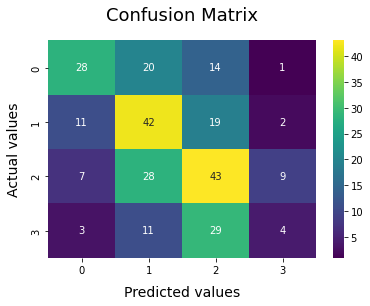

In [110]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Visualisasi

In [111]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [112]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.977848,0.431734


In [113]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [114]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.431734,0.431734,0.421221


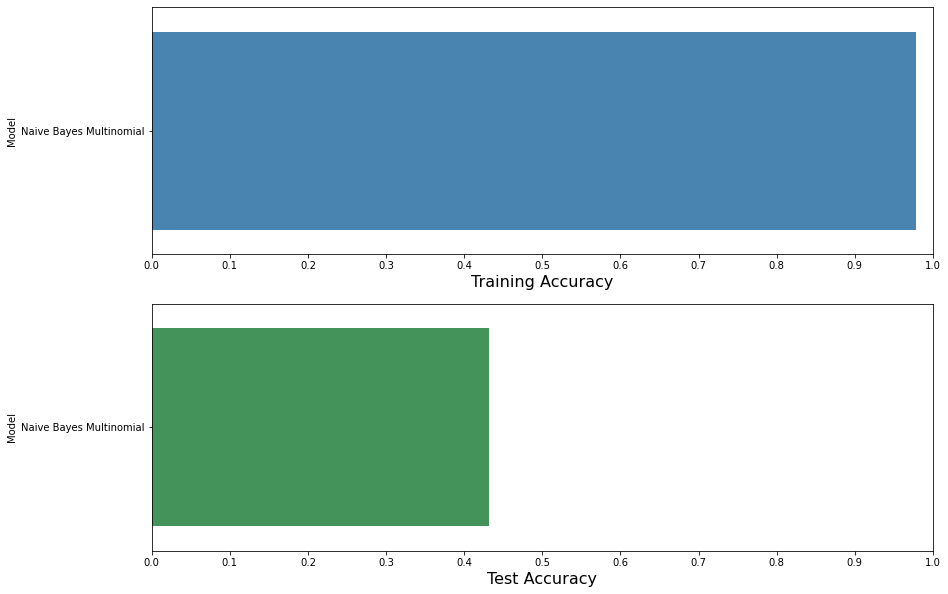

In [115]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Kesimpulan:

    Berdasarkan Training dan Testing data menghasilkan nilai Accuracy Training 0.9778481012658228 dan Accuracy Test 0.4317343173431734, Recall Training 0.9778481012658228 dan Recall Test 0.4317343173431734, Precision Training 0.9778800768908683 dan Precision Test 0.42122084375016305. Kemudian jika dilihat dari confusion Matrix bahwa hasil predited values juga hampir sesuai dengan Actual Values, sehingga dapat disimpulkan bahwa prediksi data menggunakan Naive Bayes memiliki akurasi yang baik.  